## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="outer")
# Display the data table for preview
complete_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates_df = complete_data[complete_data.duplicated(['Mouse ID','Timepoint'])]
duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989_data = complete_data.loc[complete_data["Mouse ID"]=="g989"]
mouse_g989_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data.loc[complete_data["Mouse ID"]!="g989"]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = cleaned_data.groupby(["Drug Regimen"])
avg = grouped_regimen["Tumor Volume (mm3)"].mean()
median = grouped_regimen["Tumor Volume (mm3)"].median()
variance = grouped_regimen["Tumor Volume (mm3)"].var()
stddev = grouped_regimen["Tumor Volume (mm3)"].std()
SEM = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Average Tumor Volume (mm3)" : avg,
    "Median Tumor Volume (mm3)" : median,
    "Variance":variance,
    "Std Deviation":stddev,
    "SEM":SEM
})

summary_stats

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

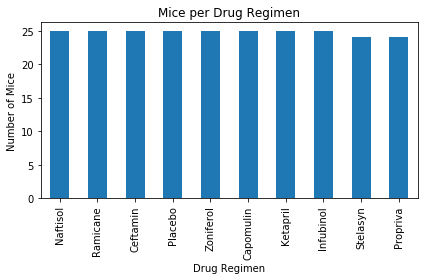

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drugs = cleaned_data.loc[:,["Drug Regimen","Mouse ID"]]
mice_drugs = mice_drugs.drop_duplicates()

mice_count = mice_drugs["Drug Regimen"].value_counts()

mice_count.plot(kind='bar')
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()



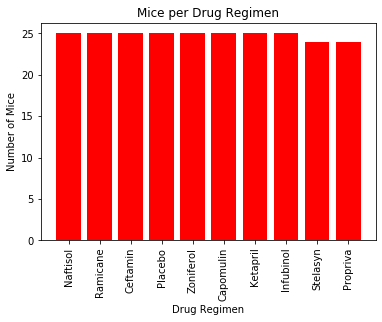

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis,y_axis,color='r',align="center")
plt.xticks(rotation=90)
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

Text(0.5, 1.0, 'Distribution of Mice Sex')

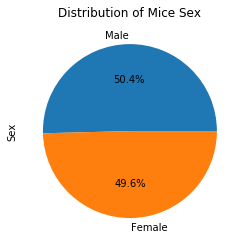

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mice = cleaned_data.loc[:,["Sex","Mouse ID"]]
sex_mice = sex_mice.drop_duplicates()

sex_count = sex_mice["Sex"].value_counts()
sex_count.plot(kind='pie',autopct='%.1f%%')
plt.title("Distribution of Mice Sex")




Text(0.5, 1.0, 'Distribution of Mice Sex')

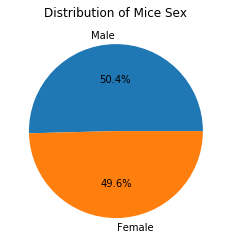

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values,labels=sex_count.index.values,autopct='%.1f%%')
plt.title("Distribution of Mice Sex")



## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_data = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Capomulin") |
                                   (cleaned_data["Drug Regimen"]=="Ramicane") |
                                   (cleaned_data["Drug Regimen"]=="Infubinol") |
                                  (cleaned_data["Drug Regimen"]=="Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = four_treatments_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(mouse_grouped,four_treatments_data,on=["Mouse ID","Timepoint"],how='left')

final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
